In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

Using TensorFlow backend.


### toy data for creating matrices to testing

In [2]:
(dataset, _), (_, _) = keras.datasets.mnist.load_data()
dataset = dataset / 255.
dataset.shape

### unitary discrete cosine transform type 4 matrix creation procedure

In [3]:
def dct(N, evalf=False):
    m = Matrix(N, N, lambda n,k: cos((pi/N)*(n+Rational(1,2))*(k+Rational(1,2))))
    m = sqrt(Rational(2,N)) * m
    if evalf:
        m = m.evalf()
    return m
def dctf(N):
    return dct(N, evalf=True)

### creates 3 toy matrices, $M_1,M_2,M_3$ and plot $M_1 M_2 M_3$

shape of M1 (20, 28)
shape of M2 (28, 14)
shape of M3 (14, 28)


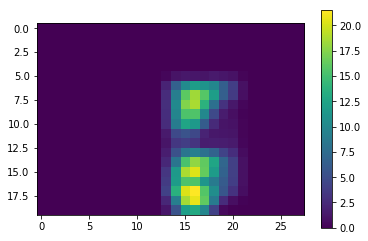

In [30]:
M1 = Matrix(dataset[5,:20,:]); print('shape of M1', M1.shape)
M2 = Matrix(dataset[9,:,:14]); print('shape of M2', M2.shape)
M3 = Matrix(dataset[3,:14,:]); print('shape of M3', M3.shape)
M = M1 @ M2 @ M3
plt.imshow(np.array(M).astype(np.float))
plt.colorbar()
plt.show()

### apply $DCT_{2D}(M)$ to toy matrices into frequency matrices, $M_1^F,M_2^F,M_3^F$

In [31]:
M1F = dctf(M1.shape[0]) @ M1 @ dctf(M1.shape[1]); print('shape of M1F', M1F.shape)
M2F = dctf(M2.shape[0]) @ M2 @ dctf(M2.shape[1]); print('shape of M1F', M2F.shape)
M3F = dctf(M3.shape[0]) @ M3 @ dctf(M3.shape[1]); print('shape of M1F', M3F.shape)

shape of M1F (20, 28)
shape of M1F (28, 14)
shape of M1F (14, 28)


### plot $DCT_{2D}^{-1}(M_1^F M_2^F M_3^F)$

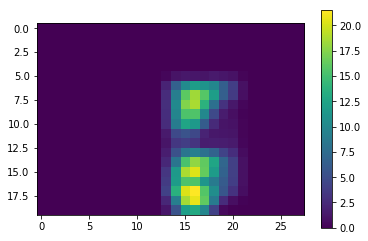

In [37]:
T = dctf(M1.shape[0]) @ (M1F @ M2F @ M3F) @ dctf(M3.shape[1])
plt.imshow(np.array(T).astype(np.float))
plt.colorbar()
plt.show()

### drop most of the insignificant frequences ($|f| < 0.2$)
- produce frequency matrices with a lot of $0$ as $M_1^{F'},M_2^{F'},M_3^{F'}$
- plot $DCT_{2D}^{-1}(M_1^{F'} M_2^{F'} M_3^{F'})$

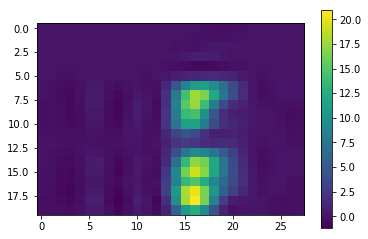

In [38]:
M1F_dropped = M1F.applyfunc(lambda x: x if abs(x) > 0.2 else 0)
M2F_dropped = M2F.applyfunc(lambda x: x if abs(x) > 0.2 else 0)
M3F_dropped = M3F.applyfunc(lambda x: x if abs(x) > 0.2 else 0)
T = dctf(M1.shape[0]) @ (M1F_dropped @ M2F_dropped @ M3F_dropped) @ dctf(M3.shape[1])
plt.imshow(np.array(T).astype(np.float))
plt.colorbar()
plt.show()

### show the removed frequece in $M_1^{F'}$
- $1$ means the fequency is keeped
- $0$ means the fequency is dropped

In [34]:
M1F_dropped.applyfunc(lambda x: 1 if x != 0 else 0)

⎡1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  0  0  0  0  1  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  0  0  1  0  1  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  0  1  1  0  1  1  1  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  1  1  1  1  1  1  1  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  1  1  1  1  1  1  0  1  0  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢1  1  1  1  0  1  1  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
⎢                                                                             
⎢0  0  1  1  1  0  1  1  0  1  1  0  0  0  0  0  0  

We could use this technique to set most of the matrix elements to 0 and skip the computation steps of them to accelerate computation time with cost of error

### vector multiplication
- we can apply $DCT_{1D}(V)$ on the vector to mitigate applying heavy $DCT_{2D}^{-1}(M)$ on matrices
- create toy vector $V$ and its frequecy vector $DCT_{1D}(V) = V^F$
- plot $M_1 M_2 M_3 V$
- plot $DCT_{1D}^{-1}(M_1^{F'} M_2^{F'} M_3^{F'} V^{F})$

shape of V (28, 1)


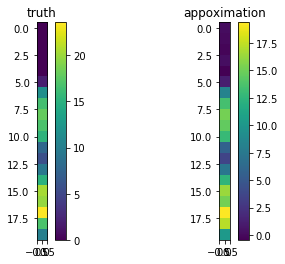

In [49]:
V = Matrix(dataset[12,:,14:15]); print('shape of V', V.shape)
VF = dctf(V.shape[0]) @ V
M = M1 @ M2 @ M3 @ V
T = dctf(M1.shape[0]) @ (M1F_dropped @ M2F_dropped @ M3F_dropped @ VF)
for i, (v, title) in enumerate(zip([M, T], ['truth', 'appoximation'])):
    plt.subplot(1,2,i+1)
    plt.title(title)
    plt.imshow(np.array(v).astype(np.float))
    plt.colorbar()
plt.show()